# DarkELF multiphonon notebook

This notebook is meant to illustrate the part of the darkELF package for calculating dark matter-phonon rates in the multiphonon regime.

written by Ethan Villarama, updated 02/08/2021

In [1]:
%matplotlib inline

import sys, os
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import rc, rcParams
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time
import pandas
from scipy import interpolate

# Make use of TeX\ufeff
rc('text',usetex=True)
# Change all fonts to 'Computer Modern'
rc('font',**{'size':14, 'family':'serif','serif':['Times New Roman']})
rc('xtick.major', size=5, pad=7)
rc('xtick', labelsize=15)
rc('ytick.major', size=5, pad=7)
rc('ytick', labelsize=15)

# this needs to point to the folder where darkelf.py is stored
work_dir = os.getcwd()
sys.path.append(work_dir+"/..")
plotdir=work_dir+"/plots/"

# load the package
from darkelf import darkelf, targets

## Load the materials

When loading the materials, the "dos_filename" flag must be set in order to calculate rates in the multiphonon regime. The "target_yaml" flag is set automatically and can be overridden. Auxiliary functions "Fn" are pre-tabulated corresponding to the given density of states files and loaded in by default. 

If starting with a new density of states, one must run the 'create_Fn_omega()' function. This defaults to creating the Fn functions corresponding to the density of states loaded in in the instantiation of the class. This can take an hour or two.

In [2]:
targets.files('Si')

Available configuration files: 
	 Si.yaml
 
Available data for epsilon: 
	 Si_Migdal_FAC.dat
	 Si_atomic_Z_eps_form_factor.dat
	 Si_mermin.dat
	 Si_gpaw_noLFE.dat
	 Si_gpaw_withLFE.dat
	 Si_epsphonon_theory6K.dat
	 Si_epsphonon_data6K.dat
	 Si_Zion.dat
 
Available data for phonon density of states: 
	 Si_DoS.dat
 
Available data for Fn(omega) functions: 
	 Si_Fn.dat
 
Available data for form factors: 
	 Si_atomic_Z_eps_form_factor.dat


If one is only interested in the multiphonon response, the electronic response specified with the "filename" flag is not used. If it is not specified, the code will produce a warning message, as seen below. There's also an optional form_factor_filename if one is interested in using a custom DM-atomic form factor. These can be ignored as long as we only care about DM-multiphonon scattering. Let's load a few materials.

In [2]:
gaas = darkelf(target='GaAs',dos_filename="GaAs_DoS.dat")
si = darkelf(target='Si',dos_filename="Si_DoS.dat")
c = darkelf(target='C',dos_filename="C_DoS.dat")

 .... Loading files for GaAs
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Warning! Atomic Migdal calculation not present
Loaded GaAs_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  GaAs_DoS.dat
Warning! Form factor not loaded. Need to set form_factor_filename if needed. Otherwise defaults to massive mediator 
 .... Loading files for Si
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Loaded Si_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  Si_DoS.dat
Warning! Form factor not loaded. Need to set form_factor_filename if needed. Otherwise defaults to massive mediator 
 .... Loading files for C
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filen

# Cross section plots

Now using the sigma_nucleon function to calculate the required DM-nucleon cross-section for a rate of 3 events/kg/yr

Points 0 to 4 took 4.96641993522644 seconds to calculate
Points 5 to 9 took 67.19914293289185 seconds to calculate
Points 10 to 14 took 54.27411508560181 seconds to calculate
Points 15 to 19 took 62.32355999946594 seconds to calculate
Points 20 to 24 took 56.92369604110718 seconds to calculate
Points 25 to 29 took 65.00770401954651 seconds to calculate
Points 30 to 34 took 66.49589514732361 seconds to calculate
Points 35 to 39 took 61.11265993118286 seconds to calculate


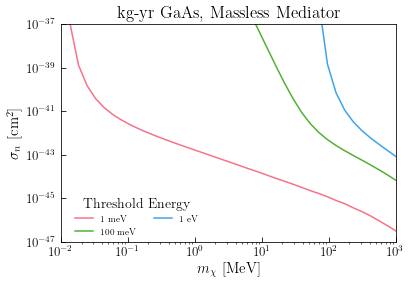

In [5]:
import seaborn as sns

points = 40

mdm = np.logspace(4, 9, points)

reaches1 = np.zeros(points)
reaches2 = np.zeros(points)
reaches3 = np.zeros(points)

import time

for i, mass in enumerate(mdm):
    if (i % 5) == 0:
        start = time.time()
    reaches1[i] = gaas.sigma_multiphonons(mass, 1e-3, mediator='massless')
    reaches2[i] = gaas.sigma_multiphonons(mass, 1e-1, mediator='massless')
    reaches3[i] = gaas.sigma_multiphonons(mass, 1, mediator='massless')

    if (i % 5) == 4:
        end = time.time()
        print(f'Points {i - 4} to {i} took {end - start} seconds to calculate')
        # Just to check that everything is still working
        
colors = sns.color_palette("husl", 3)

fig, ax = plt.subplots()


ax.plot(mdm/1e6, reaches1, label='$1$ meV', color=colors[0])
ax.plot(mdm/1e6, reaches2, label='$100$ meV', color=colors[1])
ax.plot(mdm/1e6, reaches3, label='$1$ eV', color=colors[2])


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('$m_\chi \ [\mathrm{MeV}]$',fontsize=15)
ax.set_ylabel('$\sigma_n \ [\mathrm{cm}^2]$',fontsize=15)

ax.tick_params(axis="both",which="major",labelsize=13,direction="in",pad=5)

ax.set_title(r'kg-yr GaAs, Massless Mediator')

ax.set_xlim([1e-2,1e3])
ax.set_ylim([1e-47,1e-37])

xtick_major = [pow(10.,n) for n in range(-2,4,1)]
ytick_major = [pow(10.,n) for n in range(-47,-36,2)]
ax.set_yticks(ytick_major)
ax.set_xticks(xtick_major)

ax.legend(loc=(0.03,0.01),fontsize=9,frameon=False,ncol=2,title='Threshold Energy')

plt.savefig(plotdir+"gaas_massless_multiphonon.pdf",bbox_inches='tight')


If starting with a new density of states, one must run the 'create_Fn_omega()' function. This defaults to creating the Fn functions corresponding to the density of states loaded in in the instantiation of the class. This can take an hour or two.

# Differential Rate $\frac{dR}{d\omega}$

We can calculate the differential rate as a function of the incoming dark matter mass using the function 'dR_domega_multiphonons' (defaults to coupling with mass number and $\sigma_n = 10^{-38} \mathrm{cm}^2$). Note that the single optical phonon response in the long wavelength regime we model as a Gaussian with width 0.5 meV

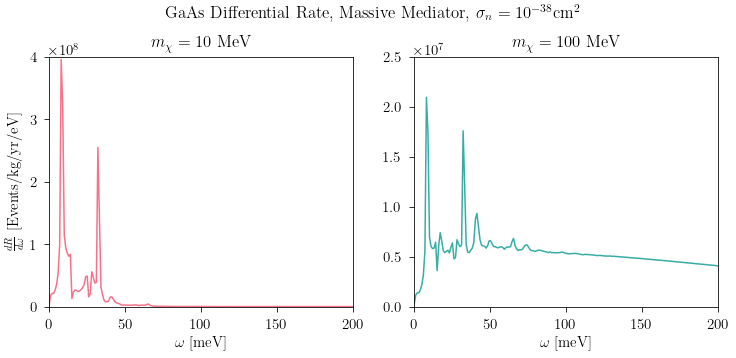

In [6]:
import seaborn as sns

mdm1 = 1e7 # eV
mdm2 = 1e8 # eV

omegarange = np.linspace(1e-4, 200e-3, 200)

dr_domega1 = [gaas.dRdomega_multiphonons(mdm1, omega, mediator='massive') for omega in omegarange]
dr_domega2 = [gaas.dRdomega_multiphonons(mdm2, omega, mediator='massive') for omega in omegarange]

colors = sns.color_palette("husl", 2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.6))

ax1.plot(omegarange*1e3, dr_domega1, color=colors[0])
ax2.plot(omegarange*1e3, dr_domega2, color=colors[1])


ax1.set_xlabel(r'$\omega \ [\mathrm{meV}]$',fontsize=15)
ax2.set_xlabel(r'$\omega \ [\mathrm{meV}]$',fontsize=15)
ax1.set_ylabel(r'$\frac{dR}{d\omega} \ [\mathrm{Events}/\mathrm{kg}/\mathrm{yr}/\mathrm{eV}]$',fontsize=15)


ax1.set_title(r'$m_\chi = 10$ MeV')
ax2.set_title(r'$m_\chi = 100$ MeV')

ax1.set_xlim([0,200])
ax2.set_xlim([0,200])

ax1.set_ylim([0,4e8])
ax2.set_ylim([0,2.5e7])


xtick_major = [50*n for n in range(5)]
ytick_major = [1e8*n for n in range(5)]
ax1.set_yticks(ytick_major)

ax1.set_xticks(xtick_major)
ax2.set_xticks(xtick_major)

ytick_major = [0.5e7*n for n in range(6)]
ax2.set_yticks(ytick_major)

plt.suptitle(r'GaAs Differential Rate, Massive Mediator, $\sigma_n = 10^{-38} \mathrm{cm}^2$', y=1.03)

plt.savefig(plotdir+"gaas_massive_rates.pdf",bbox_inches='tight')

# Custom Atomic Form Factor

Here we calculate the cross-section for a rate of 3 events/kg/yr for a dark photon, using a custom atomic form factor. In order to do this, the form factor must be loaded in at the instantiation of the class via 'form_factor_filename' and the flag 'custom_form_factor' must be set to 'True' in function calls. Note that the default coupling without a custom form factor is the mass number, setting 'custom_form_factor' to 'True' removes the mass number coupling.

 .... Loading files for Si
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Loaded Si_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  Si_DoS.dat
Loaded Si_atomic_Z_eps_form_factor.dat for form factor
Points 0 to 4 took 19.159001111984253 seconds to calculate
Points 5 to 9 took 160.73305892944336 seconds to calculate
Points 10 to 14 took 128.5582730770111 seconds to calculate
Points 15 to 19 took 98.16993308067322 seconds to calculate
Points 20 to 24 took 104.93763017654419 seconds to calculate
Points 25 to 29 took 116.04919981956482 seconds to calculate
Points 30 to 34 took 107.98134589195251 seconds to calculate
Points 35 to 39 took 99.47302293777466 seconds to calculate


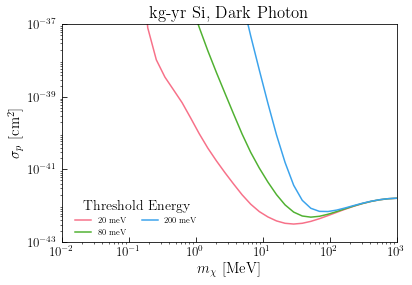

In [7]:
import seaborn as sns

# Loads dark photon form factor 
si = darkelf(target='Si',dos_filename="Si_DoS.dat",
             form_factor_filename='Si_atomic_Z_eps_form_factor.dat')

points = 40

mdm = np.logspace(4, 9, points)

reaches1 = np.zeros(points)
reaches2 = np.zeros(points)
reaches3 = np.zeros(points)


import time

for i, mass in enumerate(mdm):
    if (i % 5) == 0:
        start = time.time()
    reaches1[i] = si.sigma_multiphonons(mass, 20e-3, custom_form_factor=True)
    reaches2[i] = si.sigma_multiphonons(mass, 80e-3, custom_form_factor=True)
    reaches3[i] = si.sigma_multiphonons(mass, 200e-3, custom_form_factor=True)

    if (i % 5) == 4:
        end = time.time()
        print(f'Points {i - 4} to {i} took {end - start} seconds to calculate')
        # Just to check that everything is still working
        
colors = sns.color_palette("husl", 3)

fig, ax = plt.subplots()

ax.plot(mdm/1e6, reaches1, label='$20$ meV', color=colors[0])
ax.plot(mdm/1e6, reaches2, label='$80$ meV', color=colors[1])
ax.plot(mdm/1e6, reaches3, label='$200$ meV', color=colors[2])

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim([1e-2,1e3])
ax.set_ylim([1e-43,1e-37])

ax.set_xlabel('$m_\chi \ [\mathrm{MeV}]$',fontsize=15)
ax.set_ylabel('$\sigma_p \ [\mathrm{cm}^2]$',fontsize=15)

ax.tick_params(axis="both",which="major",labelsize=13,direction="in",pad=5)

xtick_major = [pow(10.,n) for n in range(-2,4,1)]
ytick_major = [pow(10.,n) for n in range(-43,-36,2)]
ax.set_yticks(ytick_major)
ax.set_xticks(xtick_major)

ax.set_title(r'kg-yr Si, Dark Photon')

ax.legend(loc=(0.03,0.01),fontsize=8,frameon=False,ncol=2,title="Threshold Energy",)

plt.savefig(plotdir+"si_dark_photon.pdf",bbox_inches='tight')


In [4]:
gaas.sigma_multiphonons(1.9755e4, 1e-3, mediator='massless')

6.0512055370809185e-40

In [5]:
gaas.sigma_multiphonons(1e9, 1e-3, mediator='massless')

3.112057828453959e-47

In [6]:
gaas.sigma_multiphonons(1e8, 1e-3, mediator='massless')

1.0990056038625188e-45

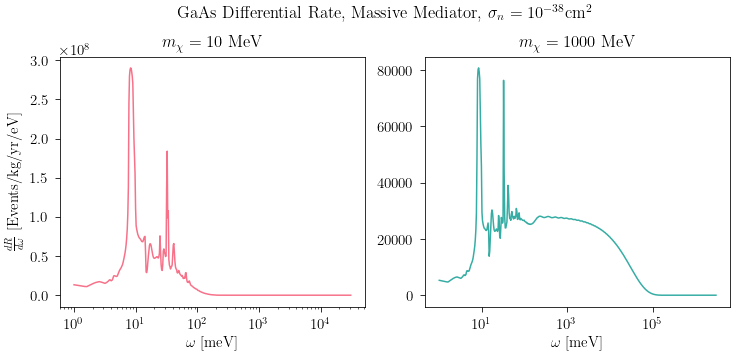

In [12]:
import seaborn as sns

mdm1 = 3e7
mdm2 = 1e9

omegarange1 = np.logspace(np.log10(1e-3), np.log10((1/2)*1e7*(gaas.vesc + gaas.veavg)**2), 500)
omegarange2 = np.logspace(np.log10(1e-3), np.log10((1/2)*1e9*(gaas.vesc + gaas.veavg)**2), 500)

dr_domega1 = [gaas.dRdomega_multiphonons(mdm1, omega, mediator='massive') for omega in omegarange1]
dr_domega2 = [gaas.dRdomega_multiphonons(mdm2, omega, mediator='massive') for omega in omegarange2]

colors = sns.color_palette("husl", 2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.6))

ax1.plot(omegarange1*1e3, dr_domega1, color=colors[0])
ax2.plot(omegarange2*1e3, dr_domega2, color=colors[1])


ax1.set_xlabel(r'$\omega \ [\mathrm{meV}]$',fontsize=15)
ax2.set_xlabel(r'$\omega \ [\mathrm{meV}]$',fontsize=15)
ax1.set_ylabel(r'$\frac{dR}{d\omega} \ [\mathrm{Events}/\mathrm{kg}/\mathrm{yr}/\mathrm{eV}]$',fontsize=15)


ax1.set_title(r'$m_\chi = 10$ MeV')
ax2.set_title(r'$m_\chi = 1000$ MeV')

#ax1.set_xlim([0,200])
#ax2.set_xlim([0,200])

#ax1.set_ylim([0,4e8])
#ax2.set_ylim([0,2.5e7])

ax1.set_xscale('log')
ax2.set_xscale('log')

#xtick_major = [50*n for n in range(5)]
#ytick_major = [1e8*n for n in range(5)]
#ax1.set_yticks(ytick_major)

#ax1.set_xticks(xtick_major)
#ax2.set_xticks(xtick_major)

#ytick_major = [0.5e7*n for n in range(6)]
#ax2.set_yticks(ytick_major)

plt.suptitle(r'GaAs Differential Rate, Massive Mediator, $\sigma_n = 10^{-38} \mathrm{cm}^2$', y=1.03)

plt.show()